In [18]:
import sys
sys.path.append("/SemSeg/keras")
sys.path.append("/SemSeg/multimodal_keras_wrapper")
sys.path.append("/SemSeg/keras_semantic_segmentation")
from keras.models import load_model
from numpy import expand_dims
from numpy import asarray
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
from keras_wrapper.dataset import loadDataset
ds = loadDataset('./datasets/Dataset_carotida_canonic.pkl')

In [3]:
print(ds)

---------------------------------------------
	Dataset carotida_canonic
---------------------------------------------
store path: /SemSeg/keras_semantic_segmentation/carotida
data length: 
	train - 141
	val   - 141
	test  - 16

[ INPUTS ]
raw-image: images

[ OUTPUTS ]
3DSemanticLabel: out_3Dlabel
---------------------------------------------



In [4]:
cmap = matplotlib.cm.get_cmap('Spectral')

In [6]:
from keras_wrapper.cnn_model import loadModel
save_epoch = 263
net = loadModel('trained_models_carotida/carotida_canonic_Tiramisu_rmsprop_model/', save_epoch)

In [7]:
predict_overriden_parameters = {'batch_size': 1, 'predict_on_sets': ['test']}
pred_net = net.predictNet(ds, predict_overriden_parameters)

/usr/local/lib/python2.7/dist-packages/scipy/misc/pilutil.py:479: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python2.7/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


16/16 [==============================] - 81s 5s/step


In [9]:
test_path = './carotida/data/test_images.txt'
with open(test_path) as f:
    test_list = f.readlines()

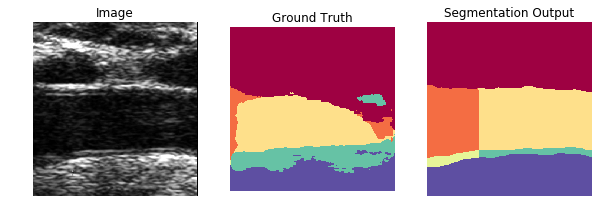

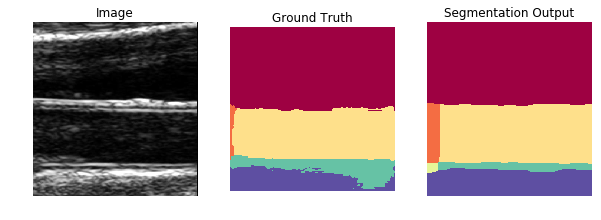

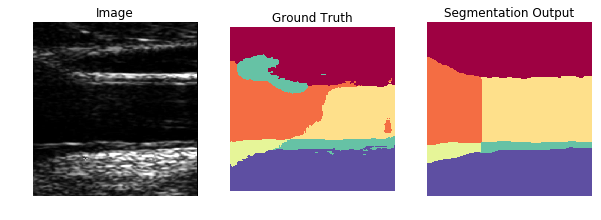

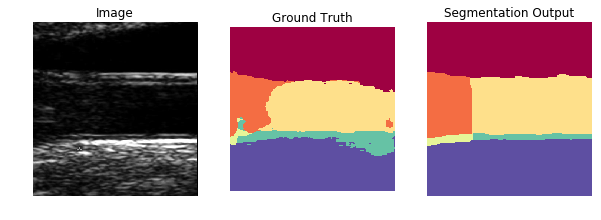

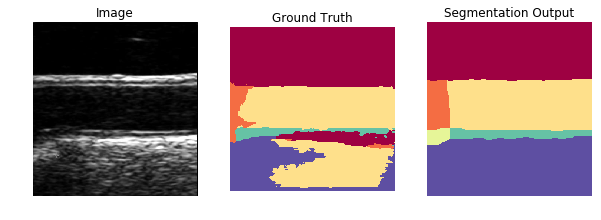

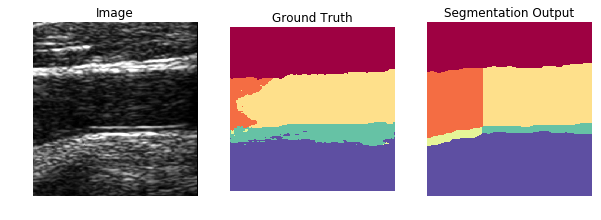

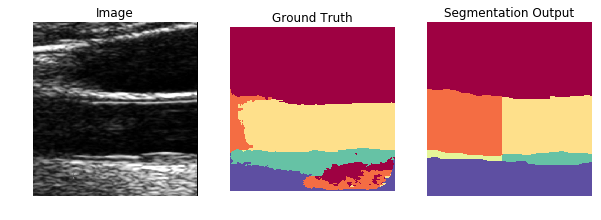

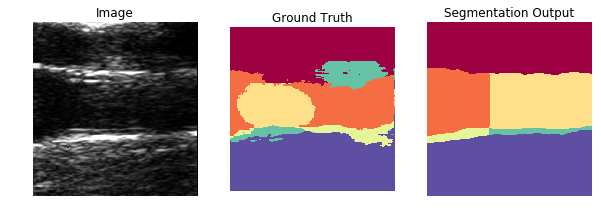

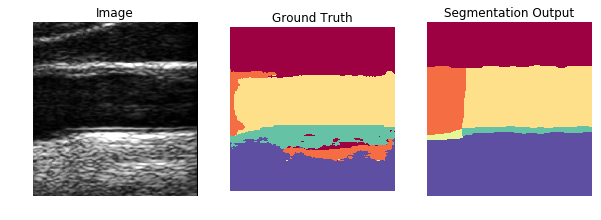

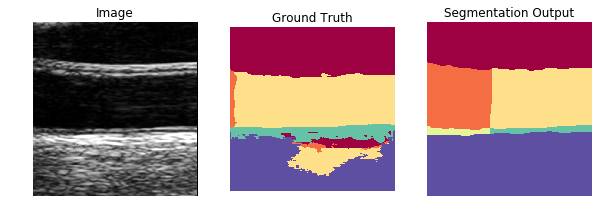

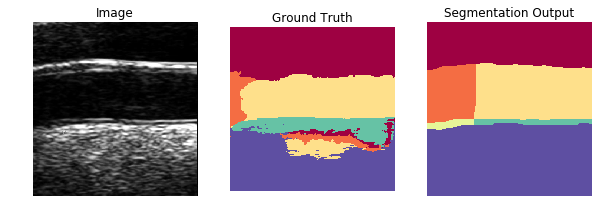

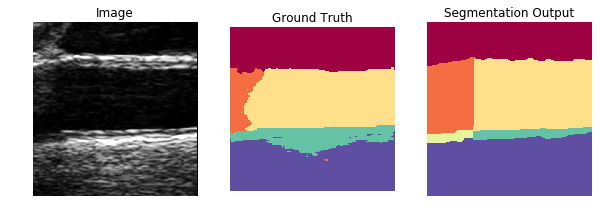

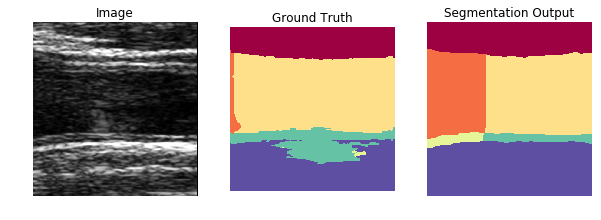

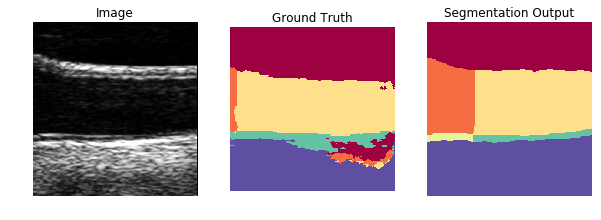

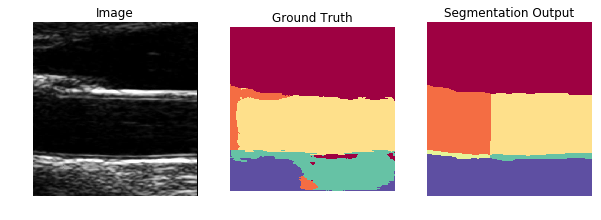

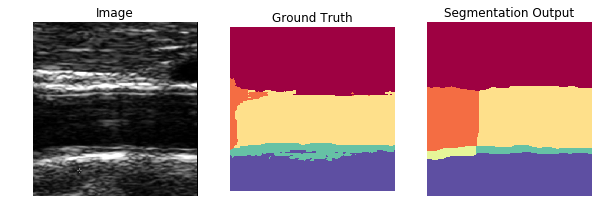

In [27]:
sets = ['test']
names = [test_list]
for ns, s in enumerate(sets):
    for i, p1 in enumerate(pred_net[s]):
        name = names[ns][i].strip().replace('/data/test/', '').replace('/data/train/', '').replace('.jpg', '')
               
        orig = cv2.imread('./carotida/data/test/' + name + '.jpg') 
        gt = cv2.imread('./carotida/data/testannot/' + name + '.png')
        
        p1p = p1.reshape(224, 224, 6)
        p1p = np.argmax(p1p, axis=2)
        
        plt.figure(figsize=(10,10));
        
        plt.subplot(131);
        plt.imshow(orig);
        plt.title('Image')
        plt.axis('off');
        
        plt.subplot(132);
        plt.imshow(p1p, cmap=cmap);
        plt.title('Ground Truth')
        plt.axis('off');
        
        plt.subplot(133);
        plt.imshow(gt[:,:,0], cmap=cmap);
        plt.title('Segmentation Output')
        plt.axis('off');
        